# RBM Testing

In [1]:
# setup
%matplotlib inline 
import pylab
import numpy as np
import matplotlib.pyplot as plt
# new version with explicit biases for comparison
from RBM import RBM
from RBMTrans import RBMTrans


plt.rcParams['figure.figsize'] = (15.0, 20.0)
plt.style.use('dark_background') 

## Ising model data 

In [2]:
dataOrig = np.load("../codeIsing/data/outputTest30000updates20000samples.npz")['arr_0']
numSamp, batchSize, n_v, n_h = dataOrig.shape[0], 100, dataOrig.shape[1] * dataOrig.shape[2], 400
data = np.reshape(dataOrig, (numSamp, n_v)).T
# copy data so the rbm call doesn't modify the data
data1st = np.copy(data)
print("data1st shape = " + str(data1st.shape))

data1st shape = (1600, 20000)


### 1st layer RBM

In [3]:
rbm1st = RBM(n_v, n_h, numSamp, batchSize)
numEpochs, learnRate, regWeight, mom, logInt = 50, 0.1, 0.008, 0.5, 1

In [4]:
# train for ___ epochs, with learning rate 0.1
W_ijs1st, aa1st, bb1st = rbm1st.train(data1st, numEpochs, learnRate, True, True, regWeight, mom, logInt)

  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:10<08:57, 10.97s/it]

  4%|▍         | 2/50 [00:22<08:56, 11.17s/it]

  6%|▌         | 3/50 [00:33<08:45, 11.17s/it]

  8%|▊         | 4/50 [00:45<08:45, 11.42s/it]

 10%|█         | 5/50 [00:58<08:45, 11.67s/it]

 12%|█▏        | 6/50 [01:13<08:56, 12.19s/it]

 14%|█▍        | 7/50 [01:31<09:19, 13.01s/it]

 16%|█▌        | 8/50 [01:47<09:24, 13.44s/it]

 18%|█▊        | 9/50 [02:03<09:22, 13.71s/it]

 20%|██        | 10/50 [02:16<09:07, 13.69s/it]

 22%|██▏       | 11/50 [02:29<08:49, 13.58s/it]

 24%|██▍       | 12/50 [02:41<08:31, 13.45s/it]

 26%|██▌       | 13/50 [02:54<08:15, 13.40s/it]

 28%|██▊       | 14/50 [03:06<07:58, 13.30s/it]

 30%|███       | 15/50 [03:18<07:43, 13.25s/it]

 32%|███▏      | 16/50 [03:30<07:27, 13.17s/it]

 34%|███▍      | 17/50 [03:42<07:12, 13.11s/it]

 36%|███▌      | 18/50 [03:55<06:58, 13.09s/it]

 38%|███▊      | 19/50 [04:07<06:44, 13.04s/it]

 40%|████      | 20/50 [04:19<06:29, 12.99s/it]

 42%|████▏     | 21/50 [04:31<06:15, 12.95s/it]

 44%|████▍     | 22/50 [04:44<06:01, 12.91s/it]

 46%|████▌     | 23/50 [04:56<05:48, 12.91s/it]

 48%|████▊     | 24/50 [05:08<05:34, 12.87s/it]

 50%|█████     | 25/50 [05:22<05:22, 12.92s/it]

 52%|█████▏    | 26/50 [05:35<05:09, 12.89s/it]

 54%|█████▍    | 27/50 [05:47<04:55, 12.86s/it]

 56%|█████▌    | 28/50 [06:00<04:43, 12.86s/it]

 58%|█████▊    | 29/50 [06:12<04:29, 12.83s/it]

 60%|██████    | 30/50 [06:24<04:16, 12.81s/it]

 62%|██████▏   | 31/50 [06:36<04:03, 12.80s/it]

 64%|██████▍   | 32/50 [06:49<03:50, 12.81s/it]

 66%|██████▌   | 33/50 [07:02<03:37, 12.80s/it]

 68%|██████▊   | 34/50 [07:14<03:24, 12.78s/it]

 70%|███████   | 35/50 [07:26<03:11, 12.76s/it]

 72%|███████▏  | 36/50 [07:38<02:58, 12.74s/it]

 74%|███████▍  | 37/50 [07:50<02:45, 12.72s/it]

 76%|███████▌  | 38/50 [08:03<02:32, 12.72s/it]

 78%|███████▊  | 39/50 [08:15<02:19, 12.70s/it]

 80%|████████  | 40/50 [08:27<02:06, 12.69s/it]

 82%|████████▏ | 41/50 [08:39<01:54, 12.67s/it]

 84%|████████▍ | 42/50 [08:52<01:41, 12.67s/it]

 86%|████████▌ | 43/50 [09:04<01:28, 12.65s/it]

 88%|████████▊ | 44/50 [09:16<01:15, 12.64s/it]

 90%|█████████ | 45/50 [09:28<01:03, 12.63s/it]

 92%|█████████▏| 46/50 [09:40<00:50, 12.61s/it]

 94%|█████████▍| 47/50 [09:54<00:37, 12.65s/it]

 96%|█████████▌| 48/50 [10:14<00:25, 12.81s/it]

 98%|█████████▊| 49/50 [10:30<00:12, 12.88s/it]

100%|██████████| 50/50 [10:47<00:00, 12.95s/it]

In [6]:
np.savez_compressed("data/couplingsL1.npz", W_ijs1st, aa1st, bb1st)

In [4]:
W_ijs1st = np.load("data/couplingsL1.npz")['arr_0']
aa1st    = np.load("data/couplingsL1.npz")['arr_1']
bb1st    = np.load("data/couplingsL1.npz")['arr_2']
rbm1st.setParams(W_ijs1st, aa1st, bb1st)

In [5]:
print(W_ijs1st.shape)
print(aa1st.shape)
print(bb1st.shape)

(50, 1600, 400)
(50, 1600, 1)
(50, 400, 1)


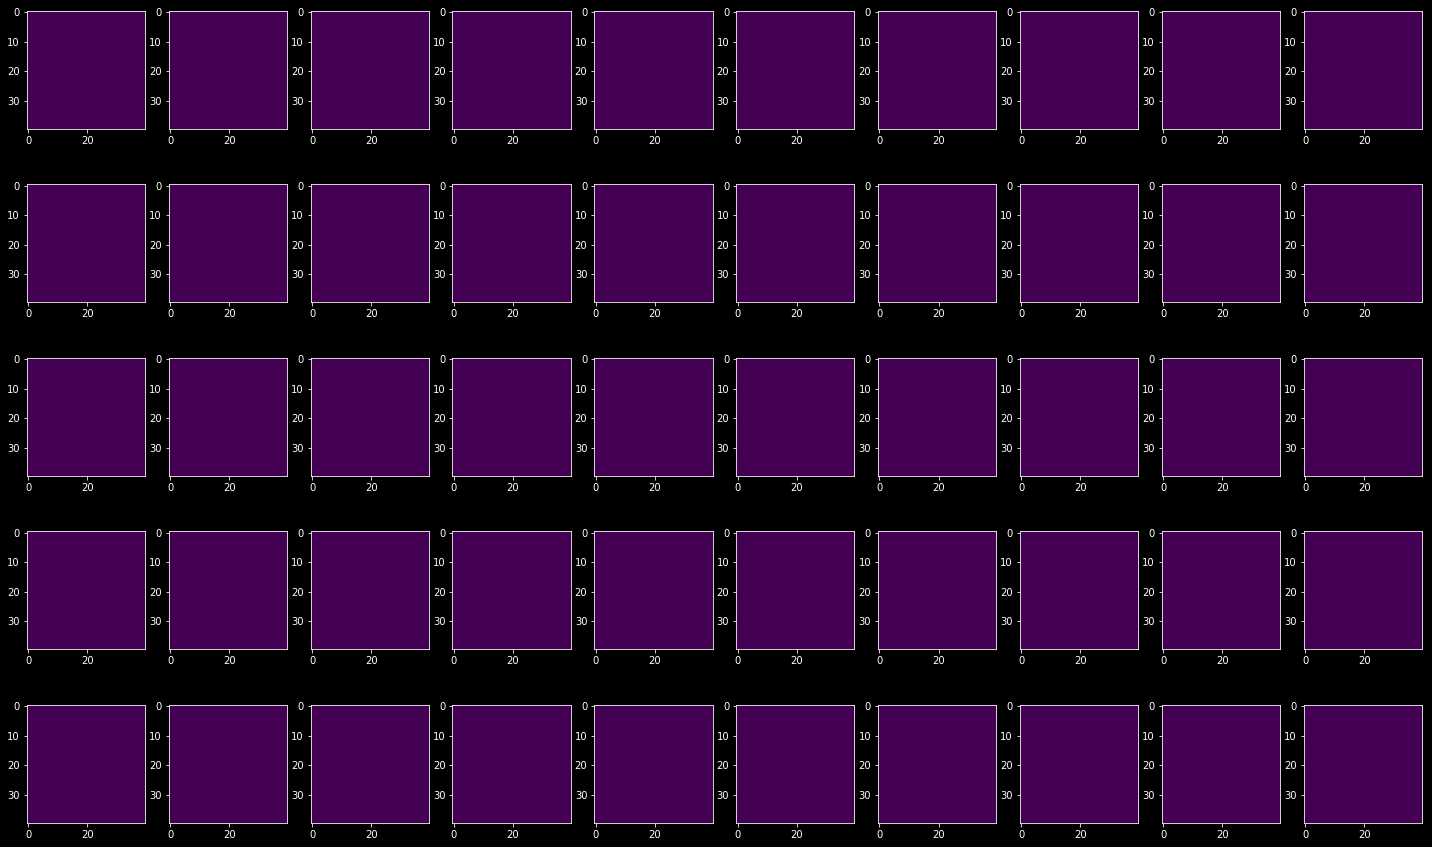

In [6]:
# Vis unit biases (a)
plt.rcParams['figure.figsize'] = (25.0, 25.0)
for i in range(aa1st.shape[0]):
  plt.subplot(8, 10, i+1)
  plt.imshow(aa1st[i, :, 0].reshape(40, 40))

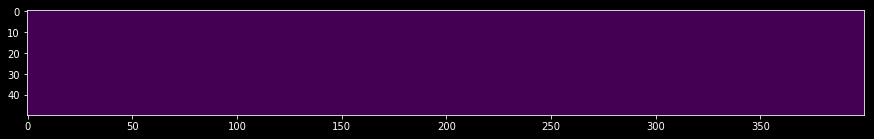

In [7]:
# Hid unit biases (b)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.imshow(bb1st[:, :, 0])

(400, 1600)


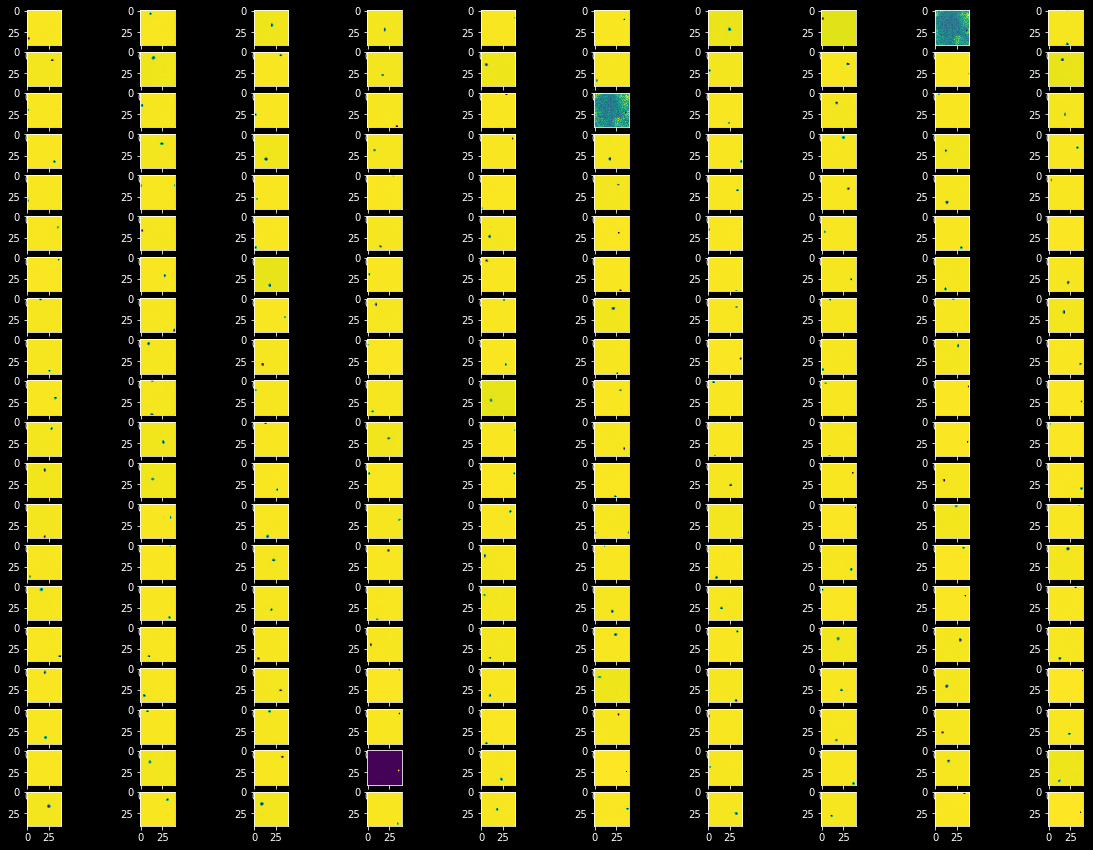

In [8]:
# Plot wijs 
plt.rcParams['figure.figsize'] = (20.0, 15.0)
wijs1st = W_ijs1st[-1, :, :].T
print(wijs1st.shape)
for i in range(200):
    plt.subplot(20, 10, i+1)
    plt.imshow(wijs1st[i].reshape(40, 40))

### Second layer RBM

In [9]:
# data for input to 2nd layer RBM
data2nd = rbm1st.vToh(data1st)
# setup 2nd RBM
numSamp, batchSize, n_v2, n_h2 = dataOrig.shape[0], 100, 400, 100
rbm2nd = RBM(n_v2, n_h2, numSamp, batchSize)
numEpochs, learnRate, regWeight, mom, logInt = 100, 0.1, 0.008, 0.5, 1

In [10]:
# train for ___ epochs, with learning rate 0.1
W_ijs2nd, aa2nd, bb2nd = rbm2nd.train(data2nd, numEpochs, learnRate, True, True, regWeight, mom, logInt)

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:02<03:42,  2.24s/it]

  2%|▏         | 2/100 [00:04<03:34,  2.19s/it]

  3%|▎         | 3/100 [00:06<03:28,  2.15s/it]

  4%|▍         | 4/100 [00:08<03:24,  2.13s/it]

  5%|▌         | 5/100 [00:10<03:20,  2.11s/it]

  6%|▌         | 6/100 [00:13<03:26,  2.19s/it]

  7%|▋         | 7/100 [00:15<03:22,  2.17s/it]

  8%|▊         | 8/100 [00:17<03:21,  2.19s/it]

  9%|▉         | 9/100 [00:19<03:18,  2.18s/it]

 10%|█         | 10/100 [00:21<03:15,  2.17s/it]

 11%|█         | 11/100 [00:23<03:12,  2.17s/it]

 12%|█▏        | 12/100 [00:25<03:10,  2.16s/it]

 13%|█▎        | 13/100 [00:28<03:07,  2.16s/it]

 14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

 15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

 16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

 17%|█▋        | 17/100 [00:36<03:00,  2.17s/it]

 18%|█▊        | 18/100 [00:39<02:59,  2.18s/it]

 19%|█▉        | 19/100 [00:41<02:57,  2.19s/it]

 20%|██        | 20/100 [00:43<02:55,  2.20s/it]

 21%|██        | 21/100 [00:46<02:54,  2.21s/it]

 22%|██▏       | 22/100 [00:48<02:52,  2.21s/it]

 23%|██▎       | 23/100 [00:51<02:50,  2.22s/it]

 24%|██▍       | 24/100 [00:53<02:48,  2.22s/it]

 25%|██▌       | 25/100 [00:55<02:47,  2.23s/it]

 26%|██▌       | 26/100 [00:58<02:45,  2.23s/it]

 27%|██▋       | 27/100 [01:00<02:43,  2.24s/it]

 28%|██▊       | 28/100 [01:02<02:41,  2.24s/it]

 29%|██▉       | 29/100 [01:05<02:39,  2.24s/it]

 30%|███       | 30/100 [01:07<02:37,  2.25s/it]

 31%|███       | 31/100 [01:10<02:35,  2.26s/it]

 32%|███▏      | 32/100 [01:13<02:35,  2.29s/it]

 33%|███▎      | 33/100 [01:15<02:33,  2.29s/it]

 34%|███▍      | 34/100 [01:18<02:32,  2.31s/it]

 35%|███▌      | 35/100 [01:20<02:30,  2.31s/it]

 36%|███▌      | 36/100 [01:23<02:28,  2.31s/it]

 37%|███▋      | 37/100 [01:25<02:25,  2.31s/it]

 38%|███▊      | 38/100 [01:27<02:23,  2.31s/it]

 39%|███▉      | 39/100 [01:30<02:21,  2.32s/it]

 40%|████      | 40/100 [01:33<02:19,  2.33s/it]

 41%|████      | 41/100 [01:35<02:17,  2.33s/it]

 42%|████▏     | 42/100 [01:37<02:15,  2.33s/it]

 43%|████▎     | 43/100 [01:40<02:12,  2.33s/it]

 44%|████▍     | 44/100 [01:42<02:10,  2.33s/it]

 45%|████▌     | 45/100 [01:45<02:08,  2.33s/it]

 46%|████▌     | 46/100 [01:47<02:06,  2.34s/it]

 47%|████▋     | 47/100 [01:50<02:04,  2.34s/it]

 48%|████▊     | 48/100 [01:53<02:02,  2.36s/it]

 49%|████▉     | 49/100 [01:55<02:00,  2.36s/it]

 50%|█████     | 50/100 [01:58<01:58,  2.36s/it]

 51%|█████     | 51/100 [02:00<01:55,  2.36s/it]

 52%|█████▏    | 52/100 [02:02<01:53,  2.36s/it]

 53%|█████▎    | 53/100 [02:05<01:51,  2.36s/it]

 54%|█████▍    | 54/100 [02:07<01:48,  2.36s/it]

 55%|█████▌    | 55/100 [02:09<01:46,  2.36s/it]

 56%|█████▌    | 56/100 [02:12<01:44,  2.37s/it]

 57%|█████▋    | 57/100 [02:14<01:41,  2.37s/it]

 58%|█████▊    | 58/100 [02:17<01:39,  2.37s/it]

 59%|█████▉    | 59/100 [02:19<01:37,  2.37s/it]

 60%|██████    | 60/100 [02:21<01:34,  2.37s/it]

 61%|██████    | 61/100 [02:24<01:32,  2.37s/it]

 62%|██████▏   | 62/100 [02:26<01:29,  2.37s/it]

 63%|██████▎   | 63/100 [02:28<01:27,  2.36s/it]

 64%|██████▍   | 64/100 [02:31<01:25,  2.36s/it]

 65%|██████▌   | 65/100 [02:33<01:22,  2.36s/it]

 66%|██████▌   | 66/100 [02:35<01:20,  2.36s/it]

 67%|██████▋   | 67/100 [02:38<01:17,  2.36s/it]

 68%|██████▊   | 68/100 [02:40<01:15,  2.36s/it]

 69%|██████▉   | 69/100 [02:42<01:13,  2.36s/it]

 70%|███████   | 70/100 [02:45<01:10,  2.36s/it]

 71%|███████   | 71/100 [02:47<01:08,  2.37s/it]

 72%|███████▏  | 72/100 [02:50<01:06,  2.37s/it]

 73%|███████▎  | 73/100 [02:52<01:03,  2.36s/it]

 74%|███████▍  | 74/100 [02:54<01:01,  2.36s/it]

 75%|███████▌  | 75/100 [02:57<00:59,  2.36s/it]

 76%|███████▌  | 76/100 [02:59<00:56,  2.36s/it]

 77%|███████▋  | 77/100 [03:01<00:54,  2.36s/it]

 78%|███████▊  | 78/100 [03:04<00:51,  2.36s/it]

 79%|███████▉  | 79/100 [03:06<00:49,  2.36s/it]

 80%|████████  | 80/100 [03:08<00:47,  2.36s/it]

 81%|████████  | 81/100 [03:11<00:44,  2.36s/it]

 82%|████████▏ | 82/100 [03:14<00:42,  2.37s/it]

 83%|████████▎ | 83/100 [03:16<00:40,  2.37s/it]

 84%|████████▍ | 84/100 [03:19<00:37,  2.37s/it]

 85%|████████▌ | 85/100 [03:21<00:35,  2.37s/it]

 86%|████████▌ | 86/100 [03:24<00:33,  2.37s/it]

 87%|████████▋ | 87/100 [03:26<00:30,  2.37s/it]

 88%|████████▊ | 88/100 [03:28<00:28,  2.37s/it]

 89%|████████▉ | 89/100 [03:31<00:26,  2.37s/it]

 90%|█████████ | 90/100 [03:33<00:23,  2.37s/it]

 91%|█████████ | 91/100 [03:35<00:21,  2.37s/it]

 92%|█████████▏| 92/100 [03:38<00:18,  2.37s/it]

 93%|█████████▎| 93/100 [03:40<00:16,  2.37s/it]

 94%|█████████▍| 94/100 [03:42<00:14,  2.37s/it]

 95%|█████████▌| 95/100 [03:45<00:11,  2.37s/it]

 96%|█████████▌| 96/100 [03:47<00:09,  2.37s/it]

 97%|█████████▋| 97/100 [03:50<00:07,  2.37s/it]

 98%|█████████▊| 98/100 [03:52<00:04,  2.37s/it]

 99%|█████████▉| 99/100 [03:54<00:02,  2.37s/it]

100%|██████████| 100/100 [03:57<00:00,  2.37s/it]

In [9]:
np.savez_compressed("data/couplingsL2.npz", W_ijs2nd, aa2nd, bb2nd)

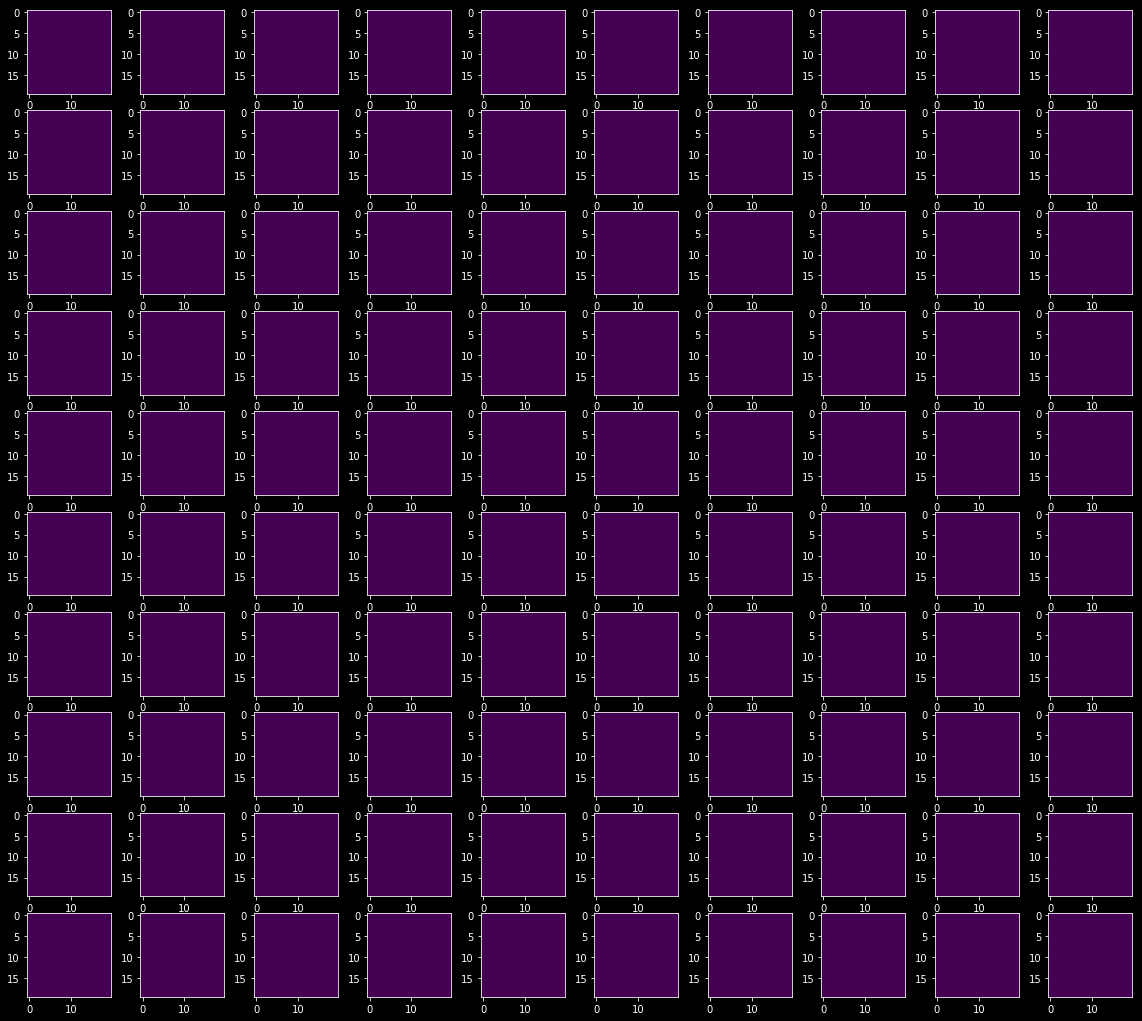

In [11]:
# Vis unit biases (a)
plt.rcParams['figure.figsize'] = (20.0, 20.0)
for i in range(aa2nd.shape[0]):
  plt.subplot(11, 10, i+1)
  plt.imshow(aa2nd[i, :, 0].reshape(20, 20))

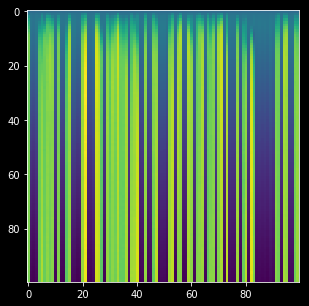

In [12]:
# Hid unit biases (b)
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.imshow(bb2nd[:, :, 0])

(100, 400)


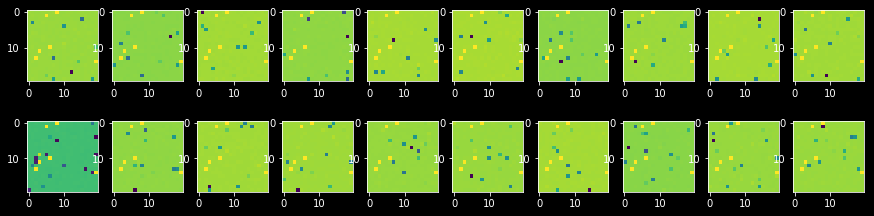

In [19]:
plt.rcParams['figure.figsize'] = (15.0, 20.0)
wijs2nd = W_ijs2nd[-1, :, :].T
print(wijs2nd.shape)
for i in range(20):
    plt.subplot(10, 10, i+1)
    plt.imshow(wijs2nd[i].reshape(20, 20))

wijs2nd shape = (100, 400)
wijs1st shape = (400, 1600)


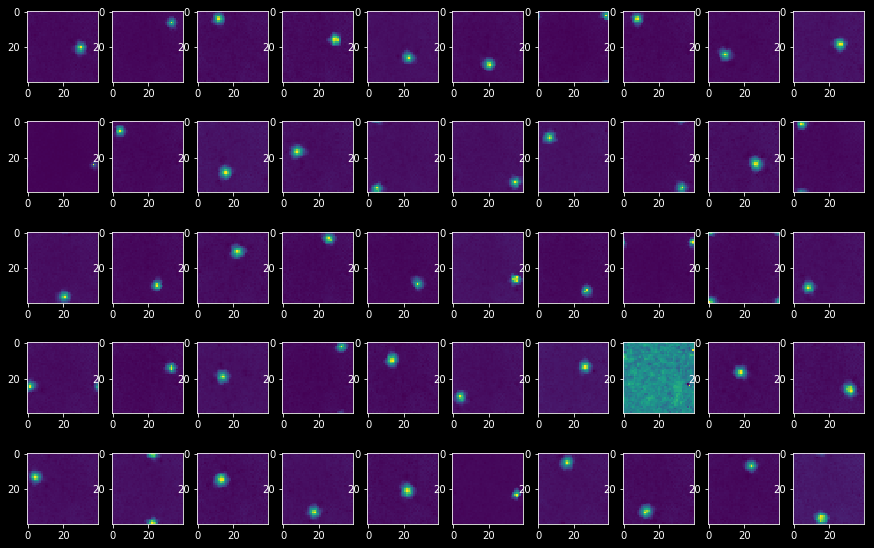

In [20]:
# reconstruction of full receptor fields
recept2nd = []
print("wijs2nd shape = " + str(wijs2nd.shape))
print("wijs1st shape = " + str(wijs1st.shape))
for i in range(n_h2):
  r2 = (1. / 400) * np.dot(wijs2nd[i, :], wijs1st)
  recept2nd.append(r2)

plt.rcParams['figure.figsize'] = (15.0, 20.0)
for i in range(50):
    plt.subplot(10, 10, i+1)
    plt.imshow(recept2nd[i].reshape(40, 40))
  

### Third layer RBM

In [13]:
# data for input to< 3rd layer RBM
data3rd = rbm2nd.vToh(data2nd)
# setup 2nd RBM
numSamp, batchSize, n_v3, n_h3 = dataOrig.shape[0], 100, 100, 25
rbm3rd = RBM(n_v3, n_h3, numSamp, batchSize)
# TODO: do an SMO over these parameters
# numEpochs, learnRate, regWeight, mom, logInt = 100, 0.1, 0.008, 0.6, 1
numEpochs, learnRate, regWeight, mom, logInt = 100, 0.2, 0.0008, 0.9, 1

In [14]:
# train for numEpochs, at learnRate
W_ijs3rd, aa3rd, bb3rd = rbm3rd.train(data3rd, numEpochs, learnRate, True, True, regWeight, mom, logInt)

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<00:37,  2.62it/s]

  2%|▏         | 2/100 [00:00<00:37,  2.64it/s]

  3%|▎         | 3/100 [00:01<00:36,  2.63it/s]

  4%|▍         | 4/100 [00:01<00:36,  2.64it/s]

  5%|▌         | 5/100 [00:01<00:35,  2.66it/s]

  6%|▌         | 6/100 [00:02<00:35,  2.67it/s]

  7%|▋         | 7/100 [00:02<00:34,  2.68it/s]

  8%|▊         | 8/100 [00:02<00:34,  2.69it/s]

  9%|▉         | 9/100 [00:03<00:33,  2.70it/s]

 10%|█         | 10/100 [00:03<00:33,  2.70it/s]

 11%|█         | 11/100 [00:04<00:32,  2.71it/s]

 12%|█▏        | 12/100 [00:04<00:32,  2.72it/s]

 13%|█▎        | 13/100 [00:04<00:31,  2.72it/s]

 14%|█▍        | 14/100 [00:05<00:31,  2.73it/s]

 15%|█▌        | 15/100 [00:05<00:31,  2.73it/s]

 16%|█▌        | 16/100 [00:05<00:30,  2.73it/s]

 17%|█▋        | 17/100 [00:06<00:30,  2.74it/s]

 18%|█▊        | 18/100 [00:06<00:29,  2.74it/s]

 19%|█▉        | 19/100 [00:06<00:29,  2.74it/s]

 20%|██        | 20/100 [00:07<00:29,  2.74it/s]

 21%|██        | 21/100 [00:07<00:28,  2.74it/s]

 22%|██▏       | 22/100 [00:08<00:28,  2.74it/s]

 23%|██▎       | 23/100 [00:08<00:28,  2.75it/s]

 24%|██▍       | 24/100 [00:08<00:27,  2.75it/s]

 25%|██▌       | 25/100 [00:09<00:27,  2.75it/s]

 26%|██▌       | 26/100 [00:09<00:26,  2.75it/s]

 27%|██▋       | 27/100 [00:09<00:26,  2.75it/s]

 28%|██▊       | 28/100 [00:10<00:26,  2.75it/s]

 29%|██▉       | 29/100 [00:10<00:25,  2.74it/s]

 30%|███       | 30/100 [00:10<00:25,  2.74it/s]

 31%|███       | 31/100 [00:11<00:25,  2.74it/s]

 32%|███▏      | 32/100 [00:11<00:24,  2.74it/s]

 33%|███▎      | 33/100 [00:12<00:24,  2.74it/s]

 34%|███▍      | 34/100 [00:12<00:24,  2.74it/s]

 35%|███▌      | 35/100 [00:12<00:23,  2.74it/s]

 36%|███▌      | 36/100 [00:13<00:23,  2.74it/s]

 37%|███▋      | 37/100 [00:13<00:22,  2.75it/s]

 38%|███▊      | 38/100 [00:13<00:22,  2.75it/s]

 39%|███▉      | 39/100 [00:14<00:22,  2.75it/s]

 40%|████      | 40/100 [00:14<00:21,  2.75it/s]

 41%|████      | 41/100 [00:14<00:21,  2.75it/s]

 42%|████▏     | 42/100 [00:15<00:21,  2.75it/s]

 43%|████▎     | 43/100 [00:15<00:20,  2.75it/s]

 44%|████▍     | 44/100 [00:16<00:20,  2.74it/s]

 45%|████▌     | 45/100 [00:16<00:20,  2.74it/s]

 46%|████▌     | 46/100 [00:16<00:19,  2.74it/s]

 47%|████▋     | 47/100 [00:17<00:19,  2.74it/s]

 48%|████▊     | 48/100 [00:17<00:18,  2.74it/s]

 49%|████▉     | 49/100 [00:17<00:18,  2.74it/s]

 50%|█████     | 50/100 [00:18<00:18,  2.75it/s]

 51%|█████     | 51/100 [00:18<00:17,  2.75it/s]

 52%|█████▏    | 52/100 [00:18<00:17,  2.75it/s]

 53%|█████▎    | 53/100 [00:19<00:17,  2.75it/s]

 54%|█████▍    | 54/100 [00:19<00:16,  2.75it/s]

 55%|█████▌    | 55/100 [00:20<00:16,  2.75it/s]

 56%|█████▌    | 56/100 [00:20<00:15,  2.75it/s]

 57%|█████▋    | 57/100 [00:20<00:15,  2.75it/s]

 58%|█████▊    | 58/100 [00:21<00:15,  2.75it/s]

 59%|█████▉    | 59/100 [00:21<00:14,  2.75it/s]

 60%|██████    | 60/100 [00:21<00:14,  2.75it/s]

 61%|██████    | 61/100 [00:22<00:14,  2.75it/s]

 62%|██████▏   | 62/100 [00:22<00:13,  2.75it/s]

 63%|██████▎   | 63/100 [00:22<00:13,  2.76it/s]

 64%|██████▍   | 64/100 [00:23<00:13,  2.76it/s]

 65%|██████▌   | 65/100 [00:23<00:12,  2.76it/s]

 66%|██████▌   | 66/100 [00:23<00:12,  2.76it/s]

 67%|██████▋   | 67/100 [00:24<00:11,  2.76it/s]

 68%|██████▊   | 68/100 [00:24<00:11,  2.76it/s]

 69%|██████▉   | 69/100 [00:25<00:11,  2.76it/s]

 70%|███████   | 70/100 [00:25<00:10,  2.76it/s]

 71%|███████   | 71/100 [00:25<00:10,  2.76it/s]

 72%|███████▏  | 72/100 [00:26<00:10,  2.76it/s]

 73%|███████▎  | 73/100 [00:26<00:09,  2.76it/s]

 74%|███████▍  | 74/100 [00:26<00:09,  2.76it/s]

 75%|███████▌  | 75/100 [00:27<00:09,  2.76it/s]

 76%|███████▌  | 76/100 [00:27<00:08,  2.76it/s]

 77%|███████▋  | 77/100 [00:27<00:08,  2.76it/s]

 78%|███████▊  | 78/100 [00:28<00:07,  2.76it/s]

 79%|███████▉  | 79/100 [00:28<00:07,  2.76it/s]

 80%|████████  | 80/100 [00:28<00:07,  2.76it/s]

 81%|████████  | 81/100 [00:29<00:06,  2.76it/s]

 82%|████████▏ | 82/100 [00:29<00:06,  2.76it/s]

 83%|████████▎ | 83/100 [00:30<00:06,  2.76it/s]

 84%|████████▍ | 84/100 [00:30<00:05,  2.76it/s]

 85%|████████▌ | 85/100 [00:30<00:05,  2.76it/s]

 86%|████████▌ | 86/100 [00:31<00:05,  2.76it/s]

 87%|████████▋ | 87/100 [00:31<00:04,  2.76it/s]

 88%|████████▊ | 88/100 [00:31<00:04,  2.76it/s]

 89%|████████▉ | 89/100 [00:32<00:03,  2.76it/s]

 90%|█████████ | 90/100 [00:32<00:03,  2.76it/s]

 91%|█████████ | 91/100 [00:32<00:03,  2.76it/s]

 92%|█████████▏| 92/100 [00:33<00:02,  2.76it/s]

 93%|█████████▎| 93/100 [00:33<00:02,  2.76it/s]

 94%|█████████▍| 94/100 [00:34<00:02,  2.76it/s]

 95%|█████████▌| 95/100 [00:34<00:01,  2.76it/s]

 96%|█████████▌| 96/100 [00:34<00:01,  2.76it/s]

 97%|█████████▋| 97/100 [00:35<00:01,  2.76it/s]

 98%|█████████▊| 98/100 [00:35<00:00,  2.76it/s]

 99%|█████████▉| 99/100 [00:35<00:00,  2.76it/s]

100%|██████████| 100/100 [00:36<00:00,  2.76it/s]

In [ ]:
np.savez_compressed("data/couplingsL3.npz", W_ijs3rd, aa3rd, bb3rd)

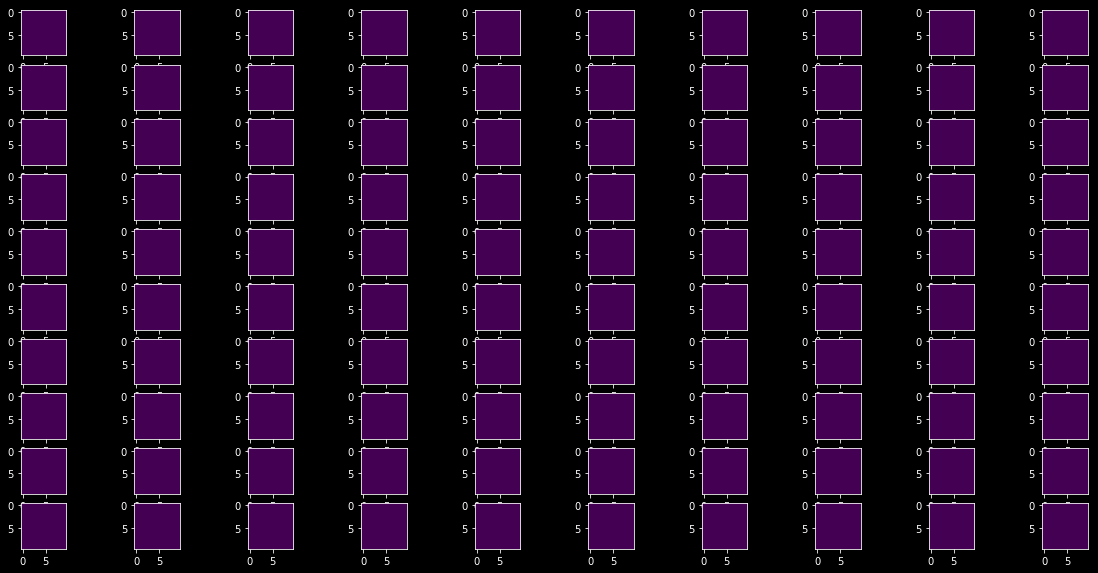

In [15]:
# Vis unit biases (a)
plt.rcParams['figure.figsize'] = (20.0, 20.0)
for i in range(aa3rd.shape[0]):
  plt.subplot(20, 10, i+1)
  plt.imshow(aa3rd[i, :, 0].reshape(10, 10))

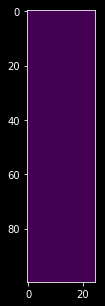

In [16]:
# Hid unit biases (b)
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.imshow(bb3rd[:, :, 0])

(25, 100)


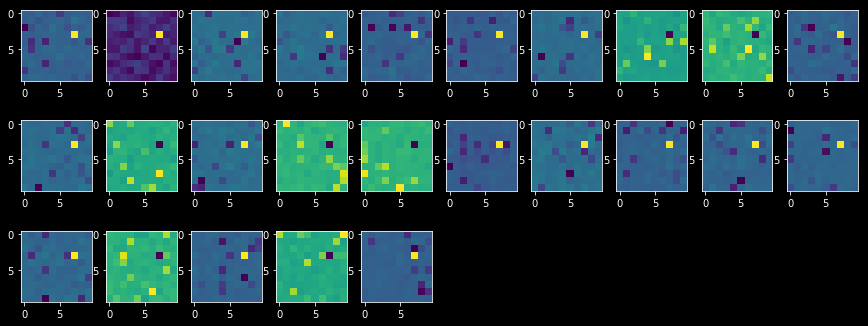

In [21]:
plt.rcParams['figure.figsize'] = (15.0, 20.0)
wijs3rd = W_ijs3rd[-1, :, :].T
print(wijs3rd.shape)
for i in range(25):
    plt.subplot(10, 10, i+1)
    plt.imshow(wijs3rd[i].reshape(10, 10))

wijs3rd shape = (25, 100)
wijs2nd shape = (100, 400)


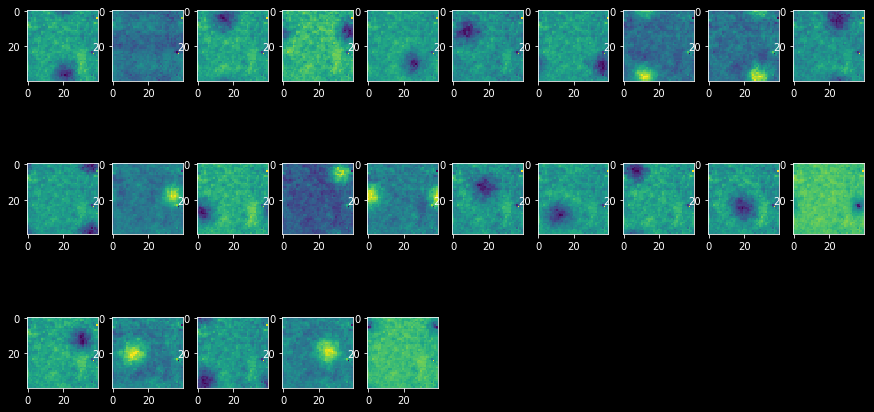

In [22]:
# reconstruction of full receptor fields
recept3rd = []
print("wijs3rd shape = " + str(wijs3rd.shape))
print("wijs2nd shape = " + str(wijs2nd.shape))
for i in range(n_h3):
  r3 = (1. / 40000) * np.dot(np.dot(wijs3rd[i, :], wijs2nd), wijs1st)
  recept3rd.append(r3)

plt.rcParams['figure.figsize'] = (15.0, 8.0)
for i in range(25):
    plt.subplot(3, 10, i+1)
    plt.imshow(recept3rd[i].reshape(40, 40))
  

## Reconstruct data

Not sure if I'm doing the reconstruction right

In [24]:
# will construct first 5 data points
dataF1 = np.copy(data[:, :5])

# dataFFin should be 25 entries
dataF2 = rbm1st.vToh(dataF1)
dataF3 = rbm2nd.vToh(dataF2)
dataFFin = rbm3rd.vToh(dataF3)

In [26]:
# reconstruction
# NB: previously I was just using dataReconONE below, which only gave the low freq part of the 
#     reconstruction. adding dataReconTWO and dataReconTHREE gives the higher freq components
dataReconONE = np.dot(wijs1st.T, np.dot(wijs2nd.T, np.dot(wijs3rd.T, dataFFin))).reshape((40, 40, 5))
dataReconTWO = np.dot(wijs1st.T, np.dot(wijs2nd.T, dataF3)).reshape((40, 40, 5))
dataReconTHREE = np.dot(wijs1st.T, dataF2).reshape((40, 40, 5))

# Not sure about the numerical weighting factors here...
dataRecon = dataReconONE + 100 * dataReconTWO + 400 * 100 * dataReconTHREE

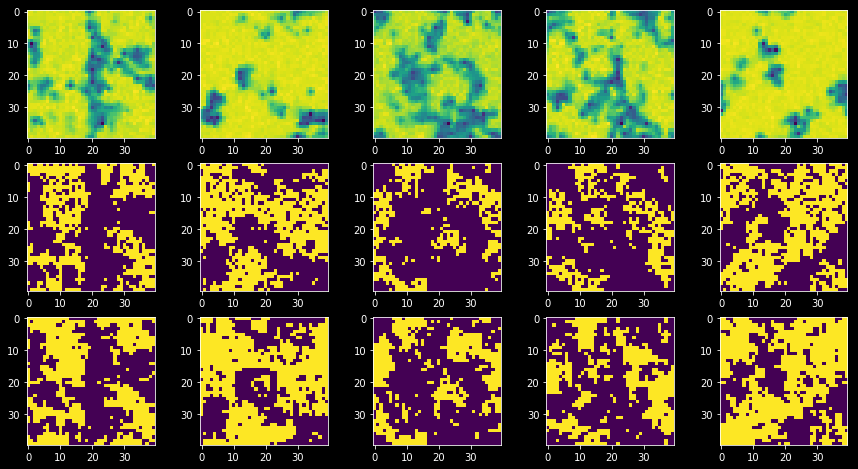

In [27]:
for i in range(5):
  # reconstructed samples
  plt.subplot(3, 5, i+1)
  plt.imshow(dataRecon[:, :, i])
  # reconstructed samples binarized
  plt.subplot(3, 5, i+6)
  plt.imshow(dataRecon[:, :, i] > 0)
  # original samples
  plt.subplot(3, 5, i+11)
  plt.imshow(dataF1[:, i].reshape(40, 40))

## TODO: Implement below

NameError: name 'rbm' is not defined

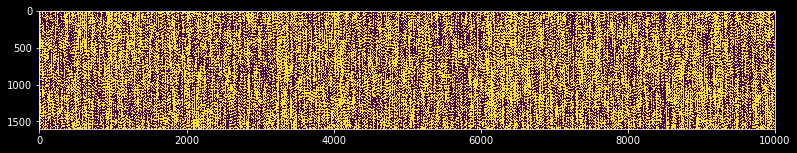

NameError: name 'rbm' is not defined

In [97]:
plt.rcParams['figure.figsize'] = (29.0, 20.0.reshape(40, 40))
plt.subplot(1, 2, 1)
plt.imshow(data)

dataCop2=np.zeros(data.shape)
np.copyto(dataCop2, data)
hidActs = rbm.vToh(dataCop2)
plt.subplot(1, 2, 2)
plt.imshow(hidActs)